# Logistic regression

## Introduction
In this lecture, you'll be introduced to the logistic regression model. We'll start with an introductory example using linear regression, which you've seen before, to act as a segue into logistic regression. After that, we'll go into more formal notation of logistic regression models. We'll conclude this lecture by looking at a real data example.

## Objectives

You will be able to:
* Understand and implement logistic regression

## Recap of the linear regression model

You have previously learned about linear regression models. In these models, what you try to do is fit a linear relationshio between two variables. An example is given below. In this example, we want to find a relationship between age and monthly income. It is definitely reasonable to assume that, on average, older people have a higher income than younger people who are newer to the job market and have less experience. A potential relationship could look like the plot below. The monthly income is shown in 1000 USD.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.5)
age = age.reshape(-1,1)

fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs income', fontsize=16)
plt.scatter(age, income)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

<Figure size 800x600 with 1 Axes>

In linear regression, we'd try to find a relationship between age and monthly income. Conceptually, we'd try to fit a line that represents the relationship between age and monthly income, as shown below.

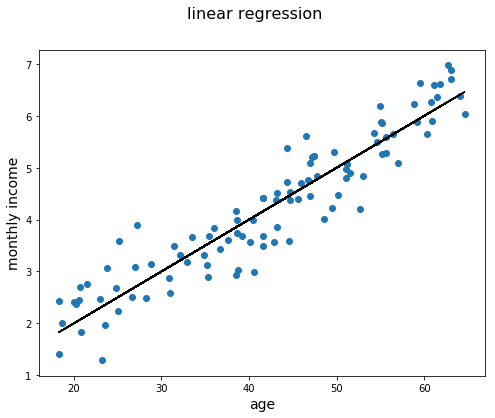

In [3]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income)
plt.plot(age, age/10, c = "black")
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

 The idea is that we could use this line to make predictions in the future. In this case, we modeled the general relationship as follows: the extected monthly income for someone who is, say, 40 years old, is 3000 (3 on the y-axis). Of course, the actual income will most likely be different, but this gives us an indication of what we could expect.

## So how is this related to logistic regression?

Now, imagine you get a data set where no information on exact income is given (after all, people don't like to talk about how much they earn!), but you only have information on whether or not thet earn more than 4000 USD per month. Starting from the generated data we used before, the new variable `income_bin` was transformed to 1 when someone's income is over 4000 USD, and 0 when the income is less than 4000 USD.

In [4]:
income_bin = income > 4
income_bin =income_bin.astype(int)  
print(income_bin)

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1]


Let's have a look at what happens when we plot this.

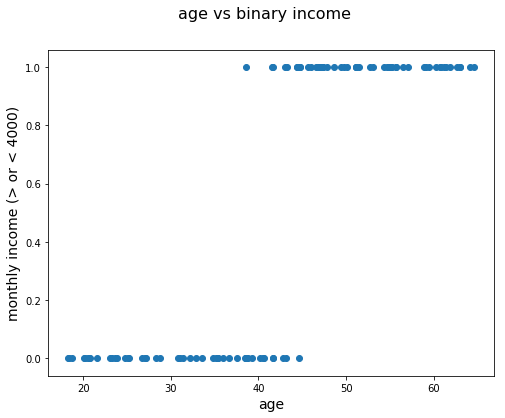

In [5]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs binary income', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income (> or < 4000)", fontsize=14)
plt.show()

You can already tell that fitting a straight line will not be exactly desired here, but let's still have a look at what happens when we formallty build a regression line to these data. 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# create linear regression object
lin_reg = LinearRegression()
lin_reg.fit(age, income_bin)
# store the coefficients
coef = lin_reg.coef_
interc = lin_reg.intercept_
# create the line
lin_income = (interc + age * coef)

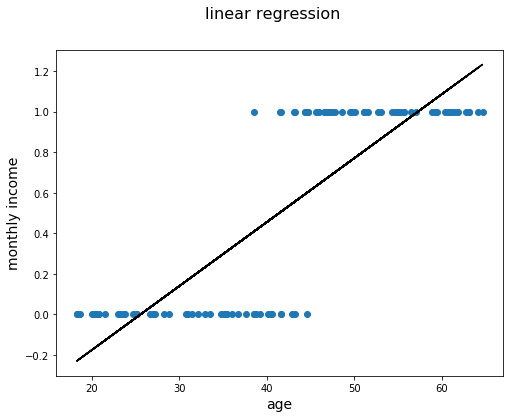

In [7]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.plot(age, lin_income, c = "black")
plt.show()

You can see that this doesn't make a lot of sense. This straight line cannot grasp the true structure of what is going on when using a linear regression model. Now, without going into the mathematical details for now, let's look at a logistic regression model and fit that to our data.

In [8]:
# Create logistic regression object
regr = LogisticRegression(C=1e5)
# Train the model using the training sets
regr.fit(age, income_bin)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [9]:
# store the coefficients
coef = regr.coef_
interc = regr.intercept_
# create the linear predictor
lin_pred= (age * coef + interc)
# perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))
#sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))

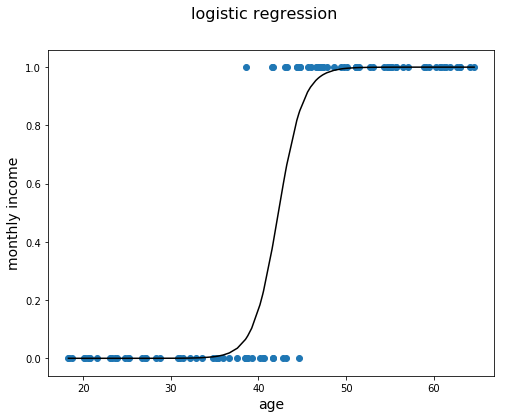

In [9]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.plot(age_ordered, mod_income_ordered, c = "black")
plt.show()

This already looks a lot better! You can see that this function has an S-shape which plateaus to 0 in the left tale and 1 to the right tale. This is exactly what we needed here. Hopefully this example was a good way of showing why logistic regression is useful. In the next section we'll dive a little deeper into the mathematics of logistic regression models.

## Logistic regression model formulation

### The model

As you might remember from the linear regression class, a formally, a linear regression model can be written as:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2, x_2 +\ldots + \beta_n x_n $$

when we have $n$ predictors $x_1,\ldots,x_n$ and $n+1$ parameter estimates that are estimated by the model $\hat\beta_0, \hat\beta_1,\ldots, \hat\beta_n$. $ \hat y $ is a estimator for the outcome variable.

Translating this model formulation to our example, this boils down to:

$$ \text{income} = \beta_0 + \beta_1 \text{age} $$

When you want to apply this to a binary dataset, what you actually want to do is perform a **classification** of your data in one group versus another one. In our case, we want to classify our observations (the 100 people in our data set) as good as possible in "earns more than 4k" and "earns less than 4k". A model will have to make a guess of what the **probability** is of belonging to one group versus another. And that exactly is what logistic regression models can do! 

essentially, what happens is, the linear regression is *transformed* in a way that the outcome takes a value between 0 and 1. This can then be interpreted as a probability (e.g., 0.2 is a probability of 20%). Applied to our example, the expression for a logistic regression model would look like this:

$$ P(\text{income} > 4000) = \displaystyle \frac{1}{1+e^{-(\hat \beta_0+\hat \beta_1 \text{age})}}$$

Note that the outcome is written as $P(\text{income} > 4000)$. This means that the output should be interpreted as *the probability that the monthly income is over 4000 USD*.

It is important to note that this is the case because the income variable was relabeled to be equal to 1 when the income is bigger than 4000, and 0 when smaller than 4000. In other words, The outcome variable should be interpreted as *the probability of the class label to be equal to 1*.




### Interpretation

As mentioned before, the probability of an income over 4000 can be calculated using:

$$ P(\text{income} > 4000) = \displaystyle \frac{1}{1+e^{-(\hat \beta_o+\hat \beta_1 \text{age})}}$$

You can show that, by multiplying both numerator and denominator by $e^{(\hat \beta_0+\hat \beta_1 \text{age})}$


$$ P(\text{income} > 4000) = \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{age}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{age}}}$$

As a result, you can compute $P(\text{income} \leq 4000)$ as:

$$ P(\text{income} < 4000) = 1- \displaystyle \frac{e^{\hat \beta_0+\hat \beta_1 \text{age}}}{1+e^{\hat \beta_o+\hat \beta_1 \text{age}}}= \displaystyle \frac{1}{1+e^{\hat \beta_0+\hat \beta_1 \text{age}}}$$



This doesn't seem to be very spectacular, but combining these two results leads to an easy interpretation of the model parameters, triggered by the *odds*

$$ \dfrac{P(\text{income} > 4000)}{P(\text{income} < 4000)} = e^{\hat \beta_0+\hat \beta_1 \text{age}} $$

This expression can be interpreted as the *odds in favor of an income greater than 4000 USD*.

This result, in combination with mathematical properties of exponential functions, leads to the fact that, applied to our example:

if *age* goes up by 1, the odds are multiplied by $e^{\beta_1}$

In our example, there is a positive relationship between age and income, this will lead a positive $\beta_1 > 0$, so $e^{\beta_1}>1$, and the odds will increase as *age* increases.



# A real data example

In [5]:
!pip install statsmodels

    100% |████████████████████████████████| 7.4MB 4.2MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 17.2MB/s ta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import pandas as pd

In [9]:
salaries = pd.read_csv("salaries_final.csv", index_col = 0)

In [4]:
from patsy import dmatrices
y, X = dmatrices('Target ~ Age  + C(Race) + C(Sex)',
                  salaries, return_type = "dataframe")

ModuleNotFoundError: No module named 'patsy'

In [16]:
import statsmodels.api as sm
logit_model = sm.Logit(y.iloc[:,1], X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.498651
         Iterations 6


In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Target[>50K]   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32554
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Dec 2018   Pseudo R-squ.:                 0.09666
Time:                        15:35:51   Log-Likelihood:                -16237.
converged:                       True   LL-Null:                       -17974.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.4248      0.189    -23.380      0.000      -4.796      -4.054
C(Race)[T.Asian-Pac-Islander]     0.9991      0.197      5.079      0.000       0.614       1.385
C(Race)[T.Black]                  0.1812      0.191      0.950      0.342      -0.193       0.555
C(Race)[T.Other]                 -0.1143      0.282     -0.406      0.685      -0.667       0.438
C(Race)[T.White]                  0.8742      0.183      4.782      0.000       0.516       1.232
C(Sex)[T.Male]                    1.2069      0.035     34.380      0.000       1.138       1.276
Age                               0.0387      0.001     38.530      0.000       0.037       0.041
=================================================================================================
"""

In [18]:
np.exp(result.params)

Intercept                        0.011977
C(Race)[T.Asian-Pac-Islander]    2.715861
C(Race)[T.Black]                 1.198638
C(Race)[T.Other]                 0.891987
C(Race)[T.White]                 2.396965
C(Sex)[T.Male]                   3.343142
Age                              1.039480
dtype: float64

You can also use scikit learn to retrieve the parameter estimates. The disadvantage here though is that there are no p-values for your parameter estimates!

In [16]:
logreg = LogisticRegression(fit_intercept = False, C = 1e15)
model_log = logreg.fit(X, y.iloc[:,1])
model_log

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
model_log.coef_

array([[-4.38706343,  0.96178903,  0.14397984, -0.14384057,  0.83689458,
         1.2067121 ,  0.03871011]])

## Summary 

In this lab we built upon our previous knowledge of linear regression and built an intuitive understanding of how this could be adapted for classification. We then demonstrated tools for performing logistic regression and briefly analyzed their output. In the upcoming lessons we will continue to investigate logistic regression from various viewpoints.